# 数据查看与分析

这个notebook用于查看和分析ADS1110的数据。

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [73]:
# 读取数据文件
df = pd.read_csv('../data/ads_20250402_184101_614.csv')

# 删除最后一列
df = df.iloc[:, :-1]

# 重命名列名
df.columns = ['timestamp', 'voltage']

# 将时间戳转换为datetime类型
df['timestamp'] = pd.to_datetime(df['timestamp'])



# 显示数据基本信息
print("数据基本信息：")
print(df.info())

# 显示前几行数据
print("\n数据预览：")
display(df.head())

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3873 entries, 0 to 3872
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timestamp  3873 non-null   datetime64[ns, UTC]
 1   voltage    3873 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 60.6 KB
None

数据预览：


,timestamp,voltage
0,2025-04-02 18:41:02.734000+00:00,1.125
1,2025-04-02 18:41:03.735000+00:00,1.125
2,2025-04-02 18:41:04.735000+00:00,1.125
3,2025-04-02 18:41:05.735000+00:00,1.125
4,2025-04-02 18:41:06.735000+00:00,1.125


In [74]:
# 数据统计描述
print("数据统计描述：")
display(df.describe())

数据统计描述：


,voltage
count,3873.000000
mean,1.162616
std,0.267842
min,1.125000
25%,1.125000
50%,1.125000
75%,1.125000
max,7.125000


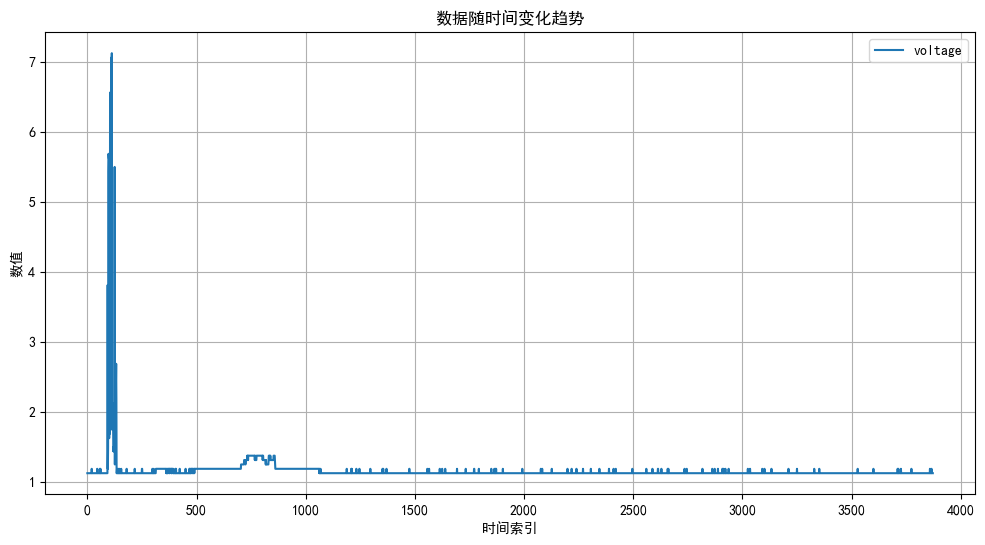

In [75]:
# 绘制数据分布图
plt.figure(figsize=(12, 6))
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.plot(df.index, df[column], label=column)
plt.title('数据随时间变化趋势')
plt.xlabel('时间索引')
plt.ylabel('数值')
plt.legend()
plt.grid(True)
plt.show()

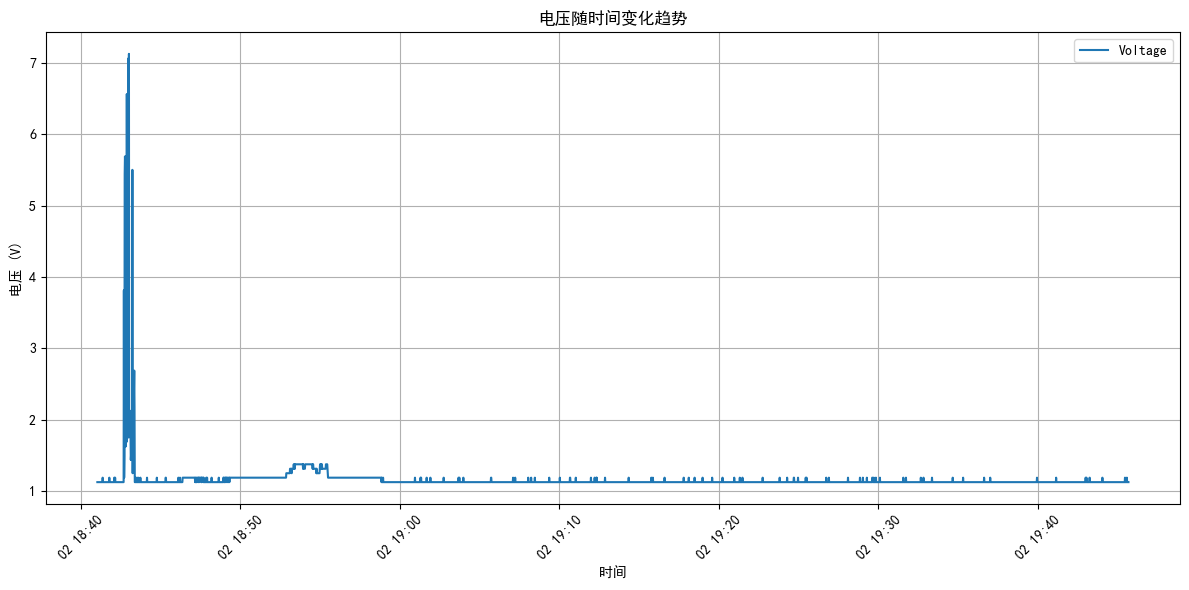

In [76]:
# 绘制voltage随时间变化的折线图
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['voltage'], label='Voltage')
plt.title('电压随时间变化趋势')
plt.xlabel('时间')
plt.ylabel('电压 (V)')
plt.legend()
plt.grid(True)

# 旋转x轴标签以防重叠
plt.xticks(rotation=45)

# 自动调整布局
plt.tight_layout()
plt.show()


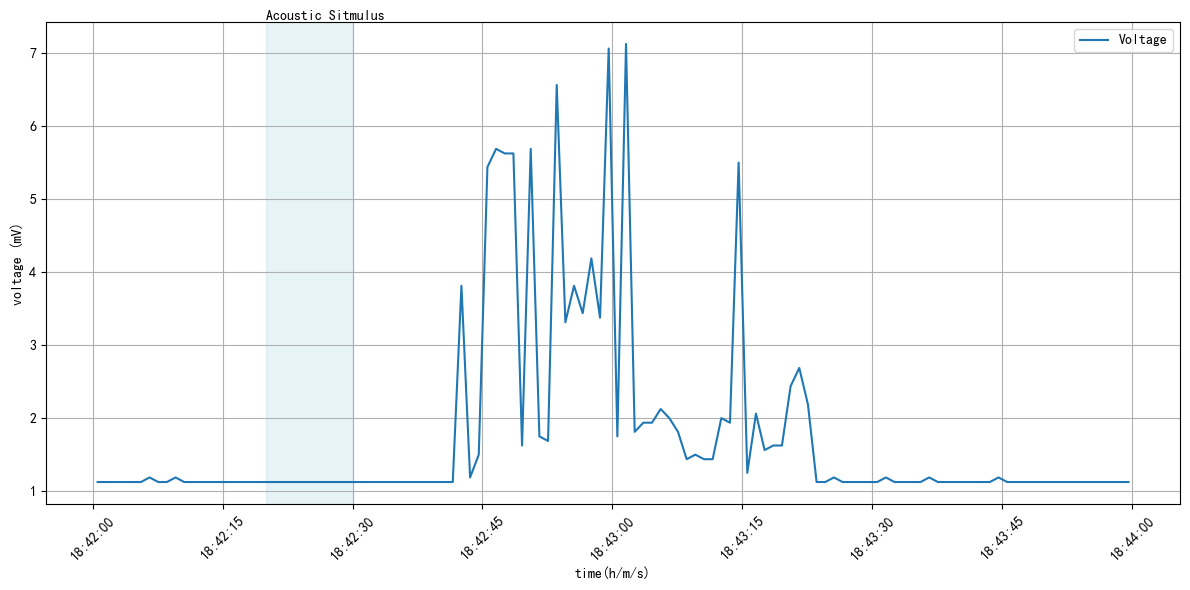

In [77]:
# 筛选18:50之前的数据
df_before_1850 = df[(df['timestamp'].dt.hour < 18) | ((df['timestamp'].dt.hour == 18) & (df['timestamp'].dt.minute >= 42))& (df['timestamp'].dt.minute < 44)]

# 绘制筛选后的数据
plt.figure(figsize=(12, 6))
plt.plot(df_before_1850['timestamp'], df_before_1850['voltage'], label='Voltage')
plt.xlabel('time(h/m/s)')
plt.ylabel('voltage (mV)')
plt.legend()
plt.grid(True)

# 绘制一条新的标注线，使用不同的颜色
start_time = pd.Timestamp('2025-04-02 18:42:20')
end_time = start_time + pd.Timedelta(seconds=10)

# 绘制标注线
plt.axvspan(start_time, end_time, color='lightblue', alpha=0.3)
plt.text(start_time, plt.ylim()[1], 'Acoustic Sitmulus', 
        verticalalignment='bottom')

# 旋转x轴标签以防重叠
plt.xticks(rotation=45)

# 自动调整布局
plt.tight_layout()
plt.show()


In [78]:
# 读取数据文件
df = pd.read_csv('../data/ads_20250410_205248_390.csv')

# 重命名列名
df.columns = ['timestamp', 'voltage']

# 将时间戳转换为datetime类型
df['timestamp'] = pd.to_datetime(df['timestamp'])



# 显示数据基本信息
print("数据基本信息：")
print(df.info())

# 显示前几行数据
print("\n数据预览：")
display(df.head())

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timestamp  2328 non-null   datetime64[ns, UTC]
 1   voltage    2328 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 36.5 KB
None

数据预览：


,timestamp,voltage
0,2025-04-10 21:00:19.873000+00:00,6.958008
1,2025-04-10 21:00:20.874000+00:00,6.958008
2,2025-04-10 21:00:21.872000+00:00,6.591796
3,2025-04-10 21:00:22.874000+00:00,6.958008
4,2025-04-10 21:00:23.874000+00:00,6.958008


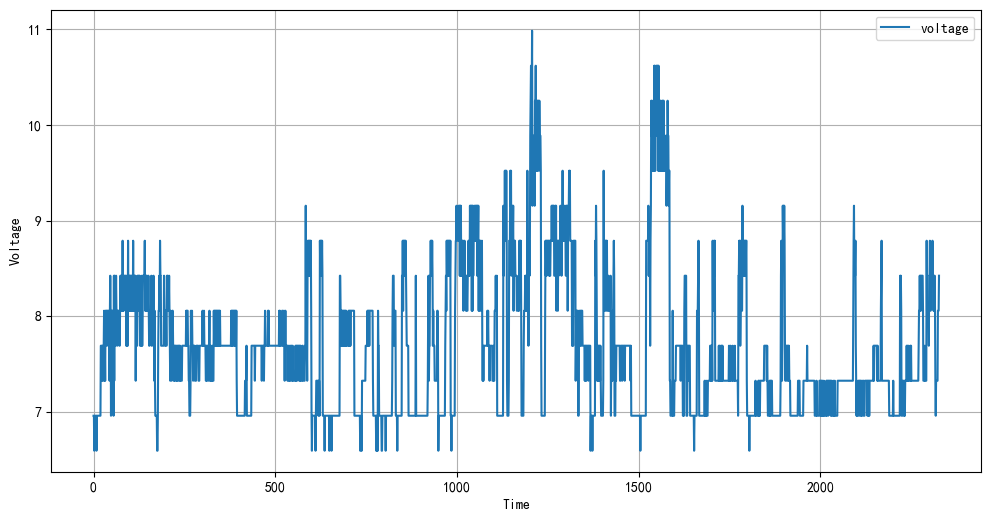

In [79]:
# 绘制数据分布图
plt.figure(figsize=(12, 6))
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.plot(df.index, df[column], label=column)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
# 导入必要的库
import wave
import numpy as np
import matplotlib.pyplot as plt

# 打开音频文件
with wave.open('recordings/ambient_sound_20250410_213839.wav', 'rb') as wav_file:
    # 获取音频参数
    n_channels = wav_file.getnchannels()
    sample_width = wav_file.getsampwidth()
    frame_rate = wav_file.getframerate()
    n_frames = wav_file.getnframes()
    
    # 读取音频数据
    audio_data = wav_file.readframes(n_frames)
    
    # 将音频数据转换为numpy数组
    if sample_width == 2:
        audio_array = np.frombuffer(audio_data, dtype=np.int16)
    elif sample_width == 4:
        audio_array = np.frombuffer(audio_data, dtype=np.int32)
    else:
        raise ValueError("不支持的采样宽度")

# 创建时间轴
time = np.linspace(0, n_frames/frame_rate, n_frames)

# 绘制音频波形图
plt.figure(figsize=(12, 6))
plt.plot(time, audio_array)
plt.title('音频波形图')
plt.xlabel('时间 (秒)')
plt.ylabel('振幅')
plt.grid(True)
plt.tight_layout()
plt.show()

# 打印音频文件信息
print(f"采样率: {frame_rate} Hz")
print(f"通道数: {n_channels}")
print(f"采样宽度: {sample_width} 字节")
print(f"总帧数: {n_frames}")
print(f"持续时间: {n_frames/frame_rate:.2f} 秒")


FileNotFoundError: [Errno 2] No such file or directory: 'recordings/ambient_sound_20250410_213839.wav'

In [20]:
# 从文件名中提取时间戳
import datetime
import pandas as pd

# 解析文件名中的时间戳
filename = 'recordings/ambient_sound_20250410_213839.wav'
timestamp_str = filename.split('_')[-2] + '_' + filename.split('_')[-1].split('.')[0]
audio_timestamp = datetime.datetime.strptime(timestamp_str, '%Y%m%d_%H%M%S')

# 将音频数据重采样为每秒一次
# 计算每秒的采样点数
samples_per_second = frame_rate
# 计算每秒的平均振幅
resampled_audio = []
resampled_timestamps = []

for i in range(0, len(audio_array), samples_per_second):
    # 获取当前秒的所有采样点
    second_samples = audio_array[i:i + samples_per_second]
    # 计算该秒的平均振幅
    avg_amplitude = np.mean(second_samples)
    # 计算时间戳
    time_offset = pd.Timedelta(seconds=float(i/samples_per_second))
    timestamp = audio_timestamp + time_offset
    
    resampled_audio.append(avg_amplitude)
    resampled_timestamps.append(timestamp)

# 创建音频数据的DataFrame
audio_df = pd.DataFrame({
    'timestamp': resampled_timestamps,
    'amplitude': resampled_audio
})

# 读取电压数据
voltage_df = df.copy()  # 使用已有的电压数据

audio_df['timestamp'] = pd.to_datetime(audio_df['timestamp'], utc=True)
voltage_df['timestamp'] = pd.to_datetime(voltage_df['timestamp'], utc=True)

In [21]:
# 统一时间戳格式
audio_df['timestamp'] = audio_df['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
voltage_df['timestamp'] = voltage_df['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')


audio_df, voltage_df

(               timestamp  amplitude
 0    2025-04-10 21:38:39   9.549977
 1    2025-04-10 21:38:40   1.586689
 2    2025-04-10 21:38:41  -0.617506
 3    2025-04-10 21:38:42  -0.828776
 4    2025-04-10 21:38:43  -1.374603
 ..                   ...        ...
 511  2025-04-10 21:47:10  -1.255556
 512  2025-04-10 21:47:11  -0.318390
 513  2025-04-10 21:47:12  -2.176757
 514  2025-04-10 21:47:13   0.886576
 515  2025-04-10 21:47:14   1.579028
 
 [516 rows x 2 columns],
                 timestamp   voltage
 0     2025-04-10 21:00:19  6.958008
 1     2025-04-10 21:00:20  6.958008
 2     2025-04-10 21:00:21  6.591796
 3     2025-04-10 21:00:22  6.958008
 4     2025-04-10 21:00:23  6.958008
 ...                   ...       ...
 2323  2025-04-10 21:39:02  7.324219
 2324  2025-04-10 21:39:03  8.056641
 2325  2025-04-10 21:39:04  8.056641
 2326  2025-04-10 21:39:05  8.056641
 2327  2025-04-10 21:39:06  8.422852
 
 [2328 rows x 2 columns])

In [24]:
# 将时间戳转换为datetime类型并设置为索引
audio_df['timestamp'] = pd.to_datetime(audio_df['timestamp'])
voltage_df['timestamp'] = pd.to_datetime(voltage_df['timestamp'])

# 将时间戳转换为数值类型（Unix时间戳）
audio_df['timestamp_numeric'] = audio_df['timestamp'].astype(np.int64) // 10**9
voltage_df['timestamp_numeric'] = voltage_df['timestamp'].astype(np.int64) // 10**9

# 根据数值时间戳合并两个DataFrame
merged_df = pd.merge_asof(audio_df.sort_values('timestamp_numeric'), 
                         voltage_df.sort_values('timestamp_numeric'),
                         on='timestamp_numeric',
                         direction='nearest')

# 删除临时数值时间戳列
merged_df = merged_df.drop('timestamp_numeric', axis=1)

# 确保时间戳格式一致
merged_df['timestamp'] = merged_df['timestamp_x'].dt.strftime('%Y-%m-%d %H:%M:%S')
merged_df = merged_df.drop(['timestamp_x', 'timestamp_y'], axis=1)


In [25]:
merged_df

,amplitude,voltage,timestamp
0,9.549977,8.422852,2025-04-10 21:38:39
1,1.586689,8.422852,2025-04-10 21:38:40
2,-0.617506,8.789063,2025-04-10 21:38:41
3,-0.828776,8.056641,2025-04-10 21:38:42
4,-1.374603,8.056641,2025-04-10 21:38:43
...,...,...,...
511,-1.255556,8.422852,2025-04-10 21:47:10
512,-0.318390,8.422852,2025-04-10 21:47:11
513,-2.176757,8.422852,2025-04-10 21:47:12
514,0.886576,8.422852,2025-04-10 21:47:13


C:\Users\Fanhao\AppData\Local\Temp\ipykernel_40928\2708865461.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\Fanhao\AppData\Local\Temp\ipykernel_40928\2708865461.py:22: UserWarning: Glyph 25391 (\N{CJK UNIFIED IDEOGRAPH-632F}) missing from current font.
  plt.tight_layout()
C:\Users\Fanhao\AppData\Local\Temp\ipykernel_40928\2708865461.py:22: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  plt.tight_layout()
C:\Users\Fanhao\AppData\Local\Temp\ipykernel_40928\2708865461.py:22: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from current font.
  plt.tight_layout()
C:\Users\Fanhao\AppData\Local\Temp\ipykernel_40928\2708865461.py:22: UserWarning: Glyph 21387 (\N{CJK UN

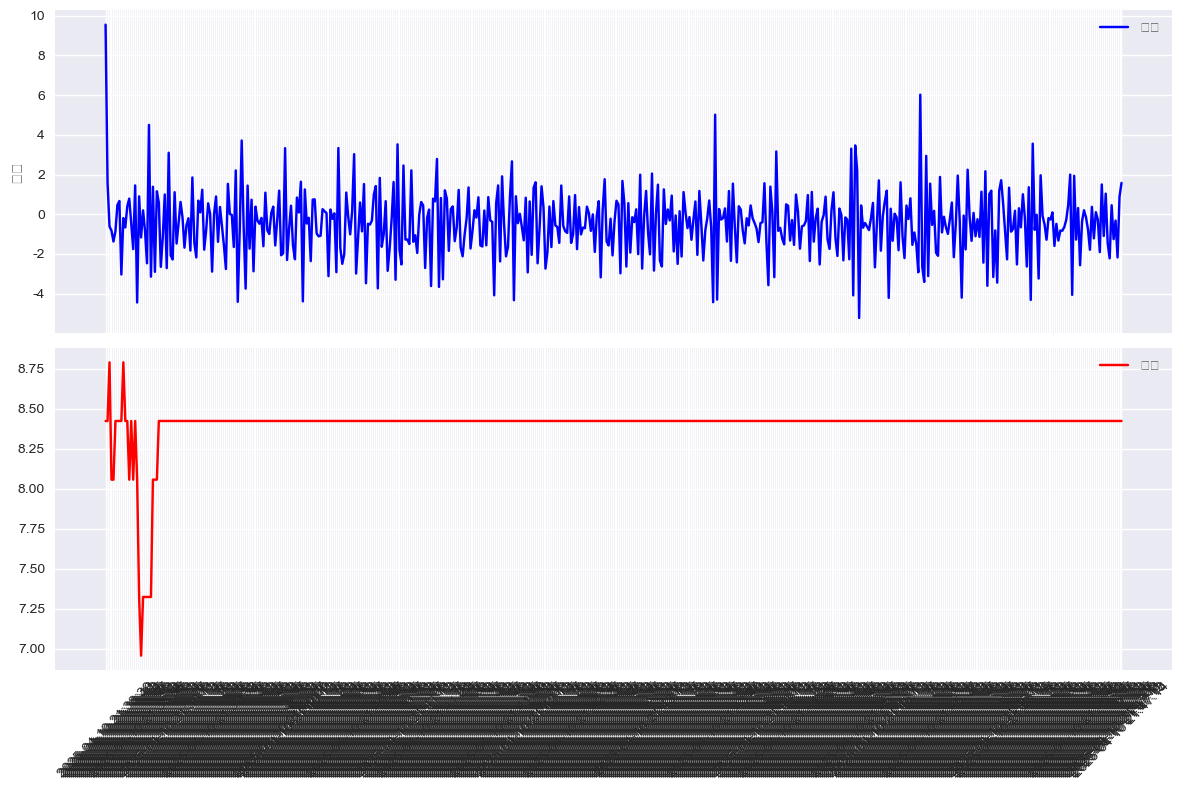

In [27]:
# 设置绘图风格
plt.style.use('seaborn')

# 创建图形和子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 绘制振幅数据
ax1.plot(merged_df['timestamp'], merged_df['amplitude'], label='振幅', color='blue')
ax1.set_ylabel('振幅')
ax1.legend()
ax1.grid(True)

# 绘制电压数据
ax2.plot(merged_df['timestamp'], merged_df['voltage'], label='电压', color='red')
ax2.legend()
ax2.grid(True)

# 设置x轴标签旋转角度
plt.xticks(rotation=45)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()
